In [1]:
import sys

sys.path.append('../')

In [2]:
import numpy as np
from qiskit.providers.fake_provider import FakeJakarta
import networkx as nx

from grouping import Grouping, build_pauli_graph, _measurement_assignment, _compatible_measurements, \
    _transpile_connected, _transpile_disconnected
from utils import number2string, random_labels

In [3]:
backend = FakeJakarta()
WC_device = backend.configuration().coupling_map
WC_device = [tuple(x) for x in WC_device]

In [24]:
n = 8
N = 4
labels = random_labels(n, N)

print(number2string(labels))

['YIIX', 'YZIX', 'XYXI', 'XXXX', 'ZXZZ', 'YXXZ', 'ZIIZ', 'XIIZ']


# Greedy grouping

In [25]:
grouping_HEEM = Grouping(labels, connectivity=WC_device, print_progress=False, method='HEEM')
grouping_HEEM.group()

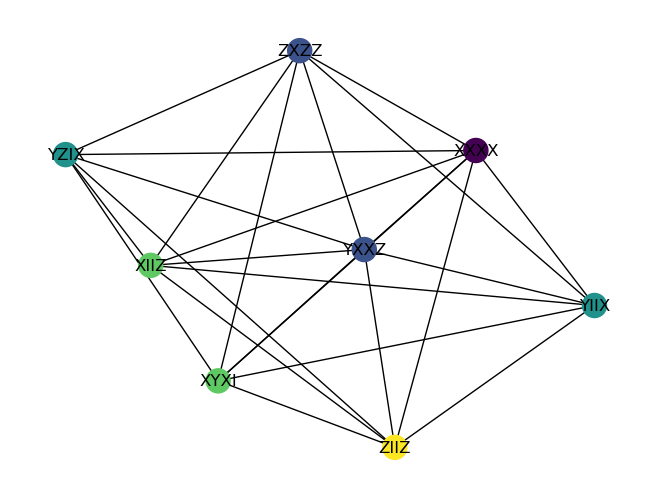

In [26]:
grouping_HEEM.draw_pauli_graph()

In [27]:
print(grouping_HEEM.groups)
for measure in grouping_HEEM.measurements:
    print(measure)

[[3], [5, 4], [0, 1], [2, 7], [6]]
[(1, [0]), (1, [1]), (1, [2]), (1, [3])]
[(7, [2, 0]), (1, [1]), (3, [3])]
[(3, [1]), (2, [0]), (0, [2]), (1, [3])]
[(1, [2]), (3, [3]), (2, [1]), (1, [0])]
[(3, [0]), (0, [1]), (0, [2]), (3, [3])]


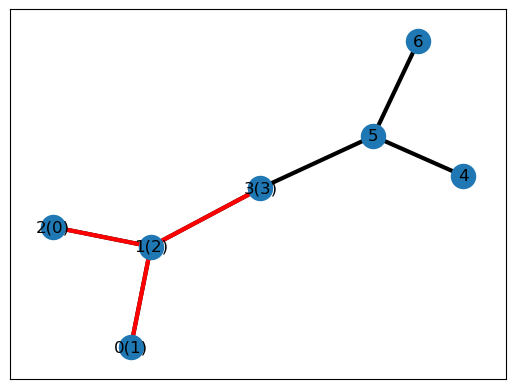

In [28]:
grouping_HEEM.draw_transpiled_chip()

# Measurement assignment

In [9]:
label1 = np.array([2, 2, 3, 1, 3, 2])
label2 = np.array([0, 1, 3, 3, 1, 1])
Mi = [(2, [0]), (3, [2])]
AM = [2, 1, 3, 8, 5, 7, 9, 6, 4]
OQ = [5, 2, 1, 3, 4, 0]
T = [0, 1, 3, 5, 2, 4]

_measurement_assignment(label1, label2, Mi, AM, WC_device, OQ, T)

([(2, [0]), (3, [2]), (8, [3, 5]), (5, [1, 4])], True)

# Iterative orders

In [10]:
n = 6
N = 3
labels = random_labels(n, N)

In [11]:
grouping_HEEM = Grouping(labels, connectivity=WC_device, print_progress=False, method='HEEM')
grouping_HEEM.group()

[2, 0, 1]


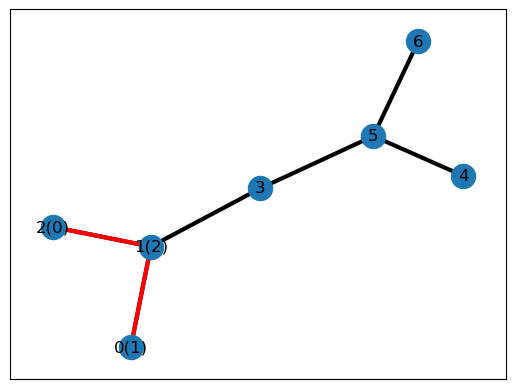

In [12]:
print(grouping_HEEM.T)
grouping_HEEM.draw_transpiled_chip()

In [13]:
print(number2string(labels))

_compatible_measurements(labels, grouping_HEEM.T, grouping_HEEM._connectivity_graph)

['IZZ', 'YYZ', 'ZYY', 'XXX', 'XYY', 'ZXY']


(array([[nan,  0.,  8.],
        [ 0., nan, 10.],
        [ 8., 10., nan]]),
 [0, 4, 7, 4, 6, 7, 1, 1, 2, 1],
 [15, 14, 22])

# Transpile

In [17]:
n = 6
N = 5
labels = random_labels(n, N)

connections = [(i, i + 1) for i in range(6)]
G = nx.Graph(connections)

C = np.zeros((N, N))
C[0, 0:] = [np.nan, 0, 0, 9, 5]
C[1, 1:] = [np.nan, 20, 8, 7]
C[2, 2:] = [np.nan, 0, 6]
C[3, 3:] = [np.nan, 0]
C[4, 4:] = [np.nan]
C += C.T

In [18]:
_transpile_connected(G, C)

[3, 0, 1, 4, 2]

In [19]:
_transpile_disconnected(G, C)

[2, 0, 1, 3, 4]